In [0]:
# 패키지 불러오기 

import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt

% matplotlib inline

In [0]:
# 불러올 모듈 경로 정하기 

module_path = "https://tfhub.dev/google/compare_gan/model_6_celebahq128_resnet19/1"

In [3]:
# 이미지 추출하기 

batch_size = 64
z_dim = 128

with tf.Graph().as_default():
    module = hub.Module(module_path)  # 모듈 불러오기 
    z_input = tf.placeholder(dtype=tf.float32, shape=(batch_size, z_dim))  # 이미지를 담을 곳 
    image_output = module(z_input, signature="generator")  # 이미지 담을 곳을 모듈에 장착
    
    with tf.train.MonitoredSession() as session:
        z_values = np.random.uniform(-1, 1, size=(batch_size, z_dim))  # 랜덤한 숫자들 생성
        images = session.run(image_output, feed_dict={z_input: z_values})  # 앞에서 만든 모듈에 랜덤한 숫자들을 넣어 이미지 생성하기 

INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


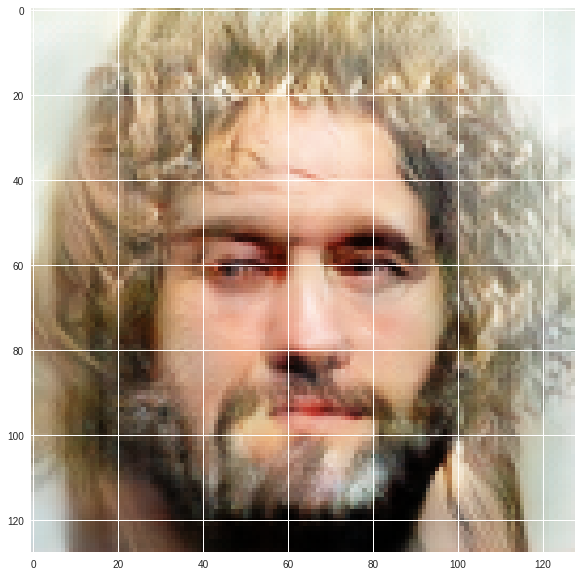

In [4]:
# 결과물 확인하기

plt.figure(figsize=(10, 10))
plt.imshow(images[0])
plt.show()